In [1]:
import sys
sys.path.append('proto')
from proto import prediction_pb2
from proto import prediction_pb2_grpc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import tempfile

from sklearn import svm, metrics
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import requests
from requests.auth import HTTPBasicAuth
from random import randint,random
import json


Instructions for updating:
Use the retry module or similar alternatives.


In [22]:


AMBASSADOR_API_IP="localhost:8002"

def rest_request(deploymentName,request):
    #payload = {'json': json.dumps(request)}
    response = requests.post(
                #"http://"+AMBASSADOR_API_IP+"/seldon/"+deploymentName+"/api/v0.1/predictions",
                "http://localhost:8009/predict",
                json=request)
                #data=payload)
    print(response)
    return response.json()   
    
def rest_request_auth(deploymentName,data,username,password):
    payload = {"data":{"ndarray":data.tolist()}}
    response = requests.post(
                "http://"+AMBASSADOR_API_IP+"/seldon/"+deploymentName+"/api/v0.1/predictions",
                json=payload,
                auth=HTTPBasicAuth(username, password))
    print(response.status_code)
    return response.json()   

def grpc_request(deploymentName,data):
    datadef = prediction_pb2.DefaultData(
            names = ["a","b"],
            tensor = prediction_pb2.Tensor(
                shape = [1,784],
                values = data
                )
            )

    request = prediction_pb2.SeldonMessage(data = datadef)
    channel = grpc.insecure_channel(AMBASSADOR_API_IP)
    stub = prediction_pb2_grpc.SeldonStub(channel)
    metadata = [('seldon',deploymentName)]
    response = stub.Predict(request=request,metadata=metadata)
    print(list(response.data.ndarray))





In [5]:
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
test_data=mnist.test.images
test_labels=np.array(np.where(mnist.test.labels==1))[1]

In [25]:
from sklearn.externals import joblib
clf = joblib.load('../models_examples/sk_mnist/train/data/models/mnist_svm_0_0/SVM.pkl')

In [26]:
# Get predictions
**Ensure you have port forwarded the ambassador reverse proxy**

```bash
kubectl port-forward $(kubectl get pod -l service=ambassador -o jsonpath='{.items[0].metadata.name}')  8002:80
```

SyntaxError: invalid syntax (<ipython-input-26-874b2a067914>, line 2)

In [38]:
!kubectl get pods

NAME                                                    READY     STATUS    RESTARTS   AGE
ambassador-689d99b97c-22tzv                             2/2       Running   0          3d
ambassador-689d99b97c-dnns5                             2/2       Running   0          3d
ambassador-689d99b97c-zp4rz                             2/2       Running   0          3d
argo-ui-9bfc9f5c-8zf44                                  1/1       Running   0          3d
centraldashboard-67b7f4d5c8-n84b7                       1/1       Running   0          3d
iefwk-configuration-7b7b687fcf-xcp6w                    1/1       Running   0          1d
iefwk-ie-deployment-547d96865c-r29nc                    1/1       Running   0          1d
mnist-sk-none-none-mnist-sk-none-none-6fd455dbb-ddtxp   2/2       Running   0          2h
mnist-svm-0-0-mnist-svm-0-0-75f496f7dc-7qctp            2/2       Running   3          42m
mypsql-postgresql-56c49bdf9b-cx6wn                      1/1       Running   0          3d
nfs-1-pr

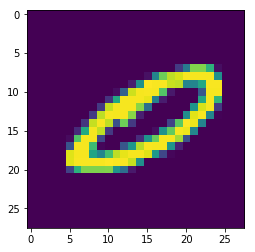

{'data': {'ndarray': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [23]:
test_index = randint(0, test_data.shape[0]-1)
plt.imshow(test_data[test_index].reshape((28,28))); plt.show()
test_samples = test_data[test_index].reshape((1,784)).tolist()

request = {"data":{"ndarray":test_samples}}

print(request)
#trying prediction with tensorflow model
#predictions = rest_request("mnist-classifier",request)
#print(json.dumps(predictions, indent=2))
#trying prediction with scikit-learn model
#predictions = grpc_request("mnist-svm-0-0",test_samples)
predictions = rest_request("mnist-svm-0-0",request)
#print type(predictions)
print(json.dumps(predictions, indent=2))
